In [1]:
# 1) Generacja danych spiralnych (2D, 2 klasy)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)  # dla powtarzalności wyników

def make_spiral(n_per_class=500, noise=0.05, twist=4*np.pi, offset=np.pi+0.3):
    # Kąt rosnący od 0 do 'twist' (np. 4π → 2 pełne obroty spirali)
    theta = np.linspace(0, twist, n_per_class)
    # Promień rosnący od środka (spirala rozwija się na zewnątrz)
    r = np.linspace(0.0, 1.5, n_per_class)

    # --- Spirala klasy 0 ---
    x0 = r * np.cos(theta) + noise * np.random.randn(n_per_class)  # współrzędna X + szum
    y0 = r * np.sin(theta) + noise * np.random.randn(n_per_class)  # współrzędna Y + szum
    c0 = np.zeros(n_per_class, dtype=np.int64)  # etykiety = 0

    # --- Spirala klasy 1 (przesunięta o 'offset') ---
    x1 = r * np.cos(theta + offset) + noise * np.random.randn(n_per_class)
    y1 = r * np.sin(theta + offset) + noise * np.random.randn(n_per_class)
    c1 = np.ones(n_per_class, dtype=np.int64)   # etykiety = 1

    # Łączenie danych w jedną macierz cech X i wektor etykiet y
    X = np.vstack([np.c_[x0, y0], np.c_[x1, y1]]).astype(np.float32)  # shape: (2*n_per_class, 2)
    y = np.concatenate([c0, c1])  # shape: (2*n_per_class,)
    return X, y

# Test: wygeneruj 2 spirale po 400 punktów
X, y = make_spiral(n_per_class=400, noise=0.05)

# Podział na zbiór treningowy i testowy (z zachowaniem proporcji klas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

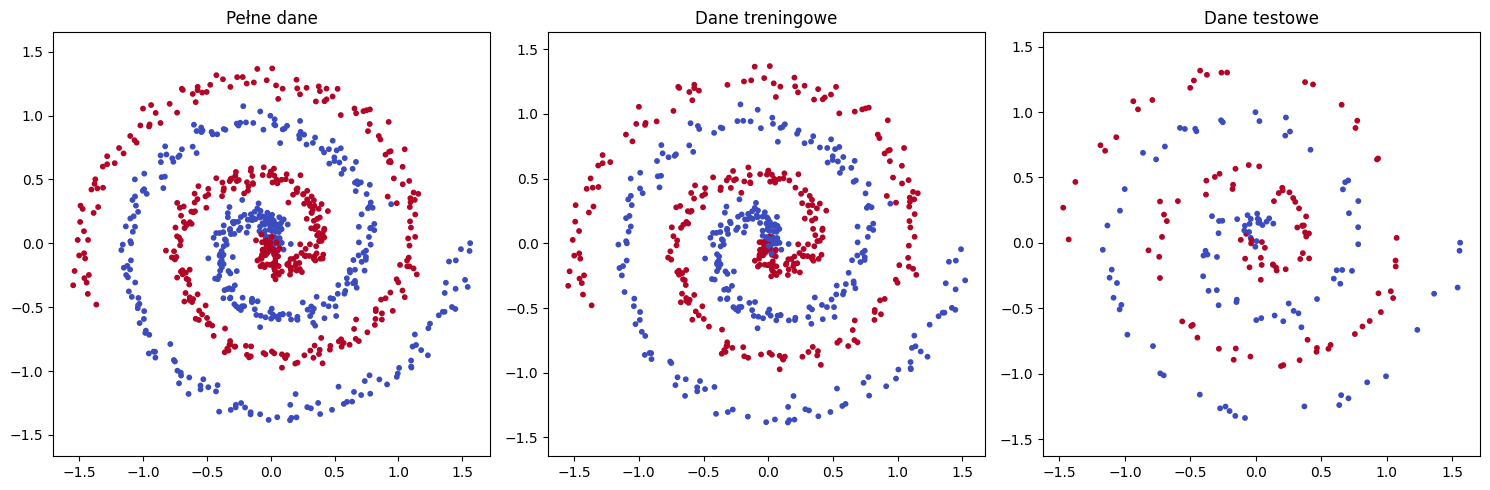

In [2]:
# 2) Wykres punktowy (scatter) danych uczących

# Rysowanie obok siebie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Wszystkie dane
axes[0].scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=10)
axes[0].set_title("Pełne dane")
axes[0].axis("equal")

# Dane treningowe
axes[1].scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm", s=10)
axes[1].set_title("Dane treningowe")
axes[1].axis("equal")

# Dane testowe
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", s=10)
axes[2].set_title("Dane testowe")
axes[2].axis("equal")

plt.tight_layout()
plt.show()

In [3]:
# Helper: 6) rysowanie granicy decyzyjnej dla funkcji predykcyjnej
from typing import Callable

def plot_decision_boundary(predict_fn: Callable[[np.ndarray], np.ndarray], X, y, title="Boundary"):
    # Siatka punktów na obszarze danych
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

    # Predykcja klas na siatce
    zz = predict_fn(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=1, alpha=0.25, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=10, edgecolor="k", linewidth=0.1)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
